#Demo 2 - Train a basic MLP on the MNIST dataset


## **Scenario: Handwritten Digit Recognition**
A startup working on digitizing old handwritten documents wants to build a fast, reliable model to automatically recognize handwritten digits (0–9).
They aim to use a simple Multilayer Perceptron (MLP) model to classify images from the MNIST dataset (which contains 28x28 grayscale images of handwritten digits).
Since this is an early prototype, the focus is on building and training a basic MLP without using complex architectures like CNNs.

## **Objectives:**
* Build and train a basic Multilayer Perceptron (MLP) model from scratch (or using PyTorch/Keras basic layers).

* Achieve at least 90% training accuracy.

* Understand the impact of hidden layers and activation functions (like ReLU) on model performance.

* Evaluate the model using metrics such as accuracy and loss curves.

## Step 1: Import Required Libraries
Import libraries for building the model, loading data, and evaluation.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.19.1
Num GPUs Available: 0


## Step 2: Load and Prepare the MNIST Dataset
Load the MNIST handwritten digit dataset from Keras datasets.

Normalize pixel values to range [0, 1] for faster convergence.


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
x_test.shape

(10000, 28, 28)

## Step 3: Flatten the Images
Flatten each 28x28 image into a 784-dimensional vector.

This is necessary because MLPs expect 1D feature vectors as input.

In [7]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [8]:
x_train.shape

(60000, 784)

## Step 4: Build the MLP Model
 Create a simple MLP with one hidden layer using ReLU activation.

 Output layer has 10 units (one for each digit) with softmax activation.

In [9]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')                     # Output layer with 10 classes
])

/Users/ranjith/ENTER/envs/mlp/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Compile the Model
Define the optimizer, loss function, and evaluation metric for training.

In [17]:
from tensorflow import keras

In [ ]:
keras.optimizers.SGD(learning_rate=0.01)

In [10]:
model.compile(
    optimizer='adam' # keras.optimizers.adam(learning_rate=0.01),                          # Adam optimizer for faster convergence
    loss='sparse_categorical_crossentropy',     # Suitable loss for multi-class classification
    metrics=['accuracy']                        # Evaluate using accuracy
)

## Step 6: Train the Model
Train the model on the training data for 10 epochs.

 Store training history to visualize learning curves.

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 0.3982 - val_accuracy: 0.9687 - val_loss: 0.1058
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.9673 - loss: 0.1076 - val_accuracy: 0.9740 - val_loss: 0.0904
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.9798 - loss: 0.0673 - val_accuracy: 0.9770 - val_loss: 0.0783
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9785 - val_loss: 0.0698
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9905 - loss: 0.0315 - val_accuracy: 0.9762 - val_loss: 0.0831
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9800 - val_loss: 0.0763
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9950 - loss: 0.0168 - val_accuracy: 0.9832 - val_loss: 0.0783
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.9958 - los

## Step 8: Plot Accuracy and Loss Curves
 Visualize how model performance improved during training.

In [12]:
history.history

{'accuracy': [0.9304259419441223,
  0.9697777628898621,
  0.9797407388687134,
  0.9860925674438477,
  0.9894444346427917,
  0.9916666746139526,
  0.9939814805984497,
  0.9947037100791931,
  0.9953148365020752,
  0.9966111183166504],
 'loss': [0.2408706545829773,
  0.0996290072798729,
  0.06536144763231277,
  0.04446897655725479,
  0.03392694145441055,
  0.02693992294371128,
  0.019213441759347916,
  0.015753047540783882,
  0.013916697353124619,
  0.010032529942691326],
 'val_accuracy': [0.968666672706604,
  0.9739999771118164,
  0.9769999980926514,
  0.9785000085830688,
  0.9761666655540466,
  0.9800000190734863,
  0.9831666946411133,
  0.984333336353302,
  0.9806666374206543,
  0.9829999804496765],
 'val_loss': [0.10582886636257172,
  0.09044074267148972,
  0.07827253639698029,
  0.06983832269906998,
  0.08314691483974457,
  0.07628243416547775,
  0.07834643125534058,
  0.0701744481921196,
  0.07763458043336868,
  0.0748521089553833]}

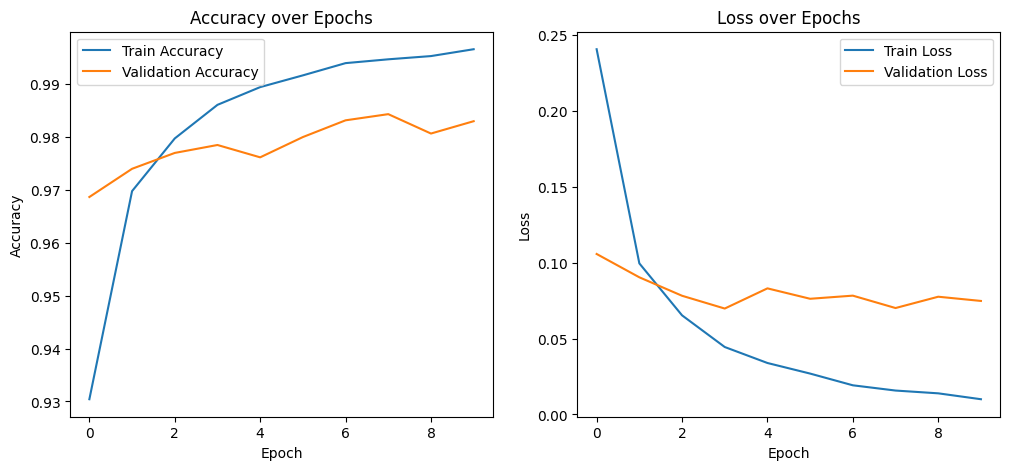

In [13]:
plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


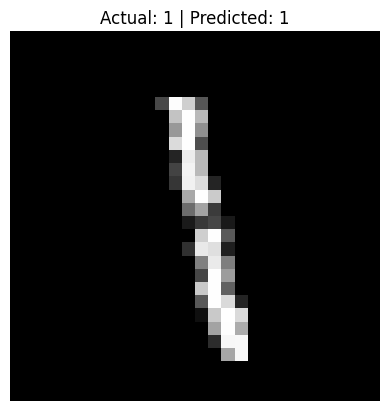

In [14]:
import random
import numpy as np
# -----------------------------
# Random prediction visualization
# -----------------------------

# Pick a random index from the test set
random_index = random.randint(0, len(x_test) - 1)

# Get the corresponding image and label
random_image = x_test[random_index]
actual_label = y_test[random_index]

# Reshape the image for prediction (1, 784)
image_reshaped = random_image.reshape(1, 784)

# Make prediction
predicted_probs = model.predict(image_reshaped)
predicted_label = np.argmax(predicted_probs)

# Display the image and results
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [15]:
random.randint(0, len(x_test) - 1)

8188

In [16]:
x_test[9563]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     